#Importando a base de dados

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dados = pd.read_csv ('tips.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Tradução

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {'total_bill': 'valor_conta', 'tip': 'gorgeta', 'dessert':'sobremesa', 'day': 'dia_semana', 'time':'hora', 'size':'total_pessoas'}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorgetas = dados.rename(columns = renomear)

In [ ]:
gorgetas.head(1)

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorgetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {'No': 'Não', 'Yes':'Sim'}

In [ ]:
gorgetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorgetas.sobremesa = gorgetas.sobremesa.map(sim_nao)

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [ ]:
gorgetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
semana = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'}

In [ ]:
gorgetas.dia_semana = gorgetas.dia_semana.map(semana)

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorgetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [ ]:
gorgetas.hora = gorgetas.hora.map(hora)

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


Será que o valor da conta influencia no valor da gorgeta???

#Análise I - Valor da conta e gorgeta

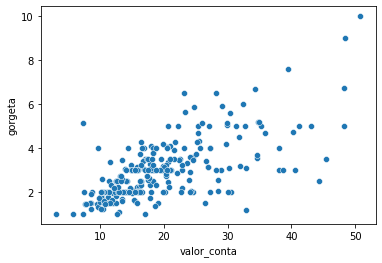

In [ ]:
valor_gorgeta = sns.scatterplot(x = 'valor_conta', y = 'gorgeta', data = gorgetas)

*** Visualmente o valor da gorgeta aumenta congirme aumenta o valor da conta ***

In [ ]:
print ('A base de dados contém: {} registros \n'.format(gorgetas.shape[0]))

A base de dados contém: 244 registros 



In [ ]:
print ('Registros não nulos')
gorgetas.count()

Registros não nulos


valor_conta      244
gorgeta          244
sobremesa        244
dia_semana       244
hora             244
total_pessoas    244
dtype: int64

## Criando o campo porcetagem

In [ ]:
gorgetas.head(1)

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [ ]:
gorgetas['Porcentagem']= gorgetas['gorgeta']/ gorgetas['valor_conta']

In [ ]:
gorgetas.head(2)

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542


In [ ]:
gorgetas.Porcentagem = gorgetas.Porcentagem.round(2)

In [ ]:
gorgetas.head(2)

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


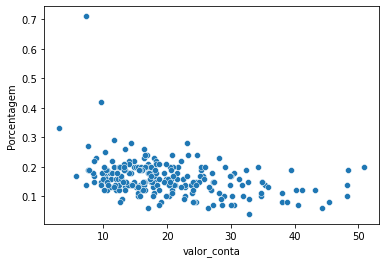

In [ ]:
porcetagem_conta = sns.scatterplot(x ='valor_conta', y = 'Porcentagem', data = gorgetas)

*** Visualmente o valor da compra não é proporcional ao valor da gorgeta***

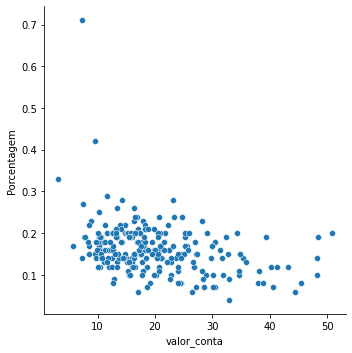

In [ ]:
porcetagem_conta_linha = sns.relplot(x ='valor_conta', y = 'Porcentagem', data = gorgetas)

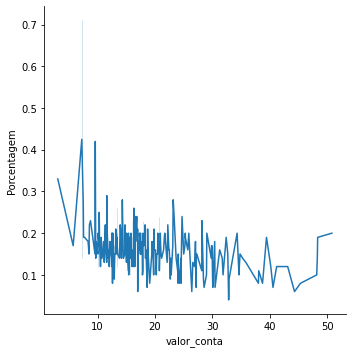

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='Porcentagem', kind='line', data=gorgetas)

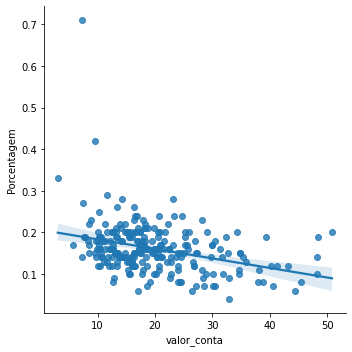

In [ ]:
sns.lmplot(x='valor_conta', y='Porcentagem', data=gorgetas)

# Exportando figuras


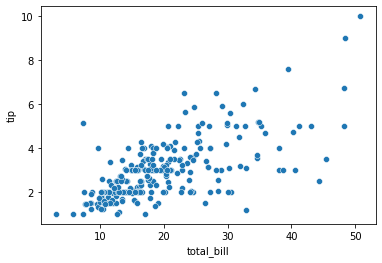

In [ ]:
primeiro_plot = sns.scatterplot(x='total_bill', y='tip', data=dados)

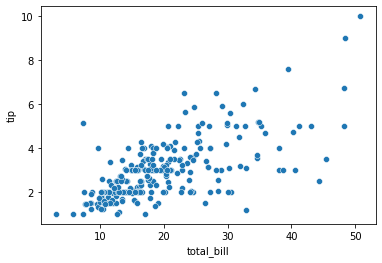

In [ ]:
primeiro_plot.get_figure()

In [ ]:
primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

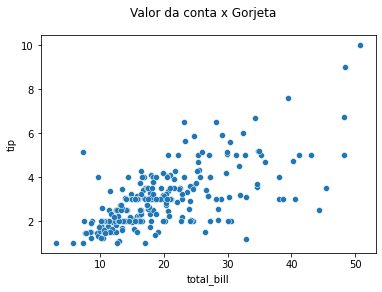

In [ ]:
primeiro_plot.get_figure()

In [ ]:
primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')

Text(0.5, 1.0, 'Análise do valor da gorjeta em função do valor da conta')

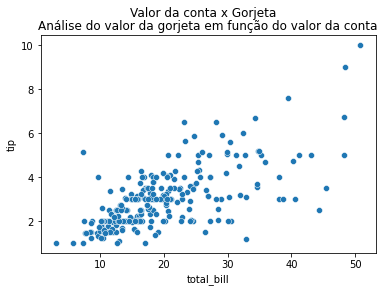

In [ ]:
primeiro_plot.get_figure()

In [ ]:
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

[Text(17.200000000000003, 0.5, 'Valor da gorjeta'),
 Text(0.5, 18.106250000000003, 'Valor da conta')]

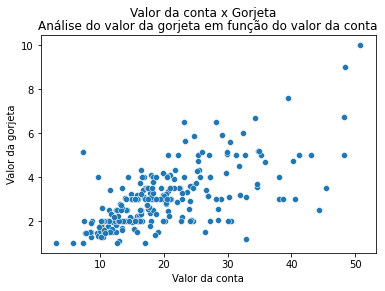

In [ ]:
primeiro_plot.get_figure()

In [ ]:
 imagem = primeiro_plot.get_figure()

In [ ]:
imagem.savefig('imagem.png')

#Análises II - Sobremesa (análises descritivas)

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorgetas[gorgetas.sobremesa == 'Sim'].describe().round(2)

,valor_conta,gorgeta,total_pessoas,Porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [ ]:
gorgetas[gorgetas.sobremesa == 'Não'].describe().round(2)

,valor_conta,gorgeta,total_pessoas,Porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


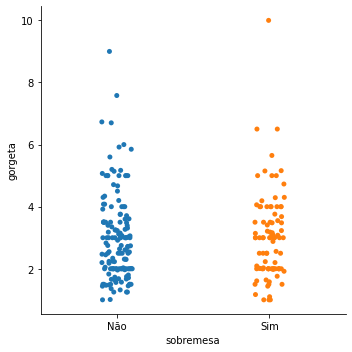

In [ ]:
sns.catplot(x= 'sobremesa', y = 'gorgeta', data = gorgetas)

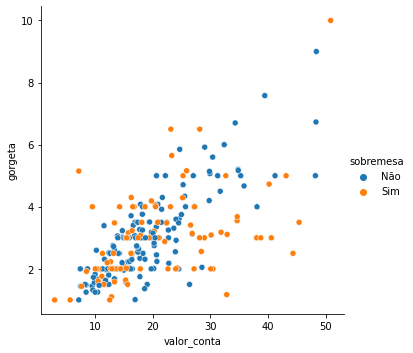

In [ ]:
sns.relplot(x='valor_conta', y='gorgeta', hue = 'sobremesa', data = gorgetas)

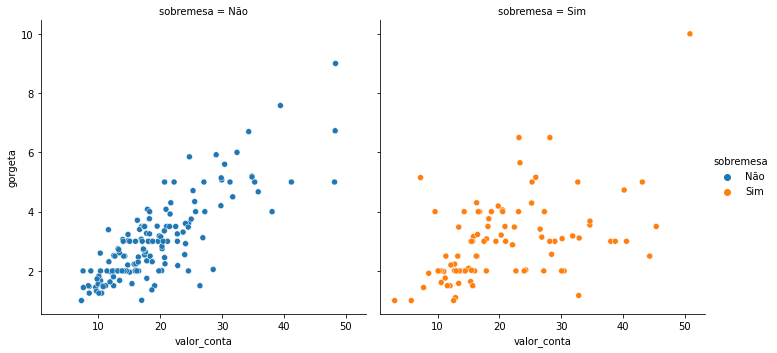

In [ ]:
sns.relplot(x='valor_conta', y='gorgeta', hue = 'sobremesa', col='sobremesa', data = gorgetas)

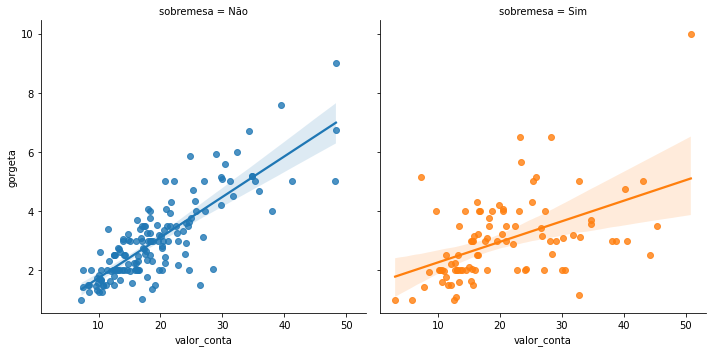

In [ ]:
sns.lmplot(x= 'valor_conta', y = 'gorgeta', col = 'sobremesa', hue = 'sobremesa', data = gorgetas)

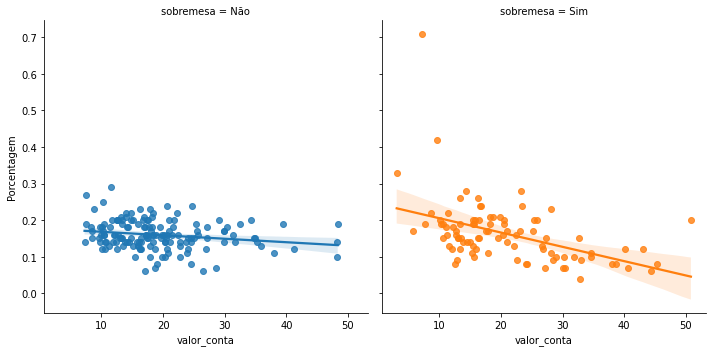

In [ ]:
sns.lmplot(x= 'valor_conta', y = 'Porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorgetas)

*** Visualmente existe uma diferença no valor da gorgeta daqueles que pediram ou não sobremesa ***

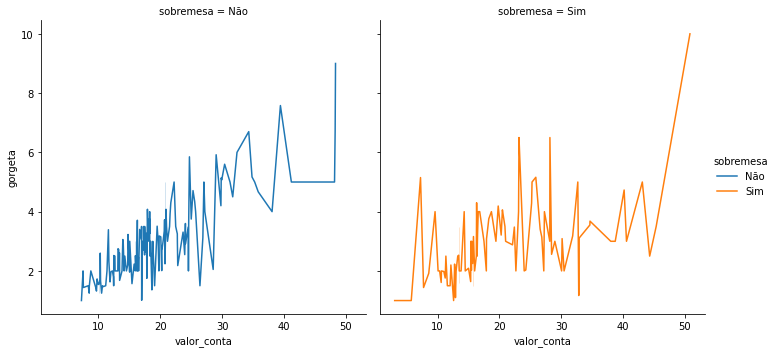

In [ ]:
sns.relplot(x='valor_conta', y='gorgeta', col='sobremesa', hue='sobremesa', kind='line', data=gorgetas)

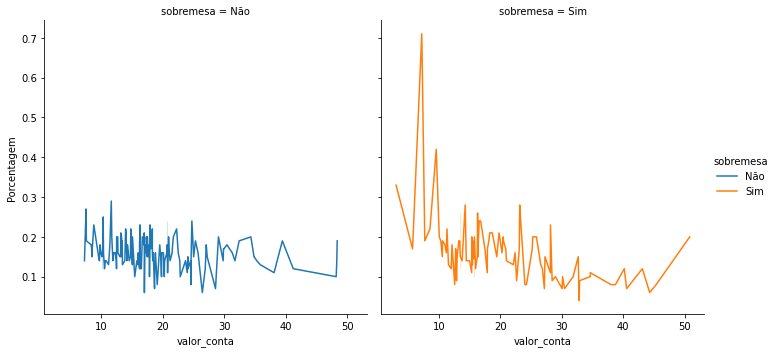

In [ ]:
sns.relplot(x='valor_conta', y='Porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorgetas)

##  Teste de Hipótese

**H<sup>null</sup>**

>** A distribuiçã da taxa da gorgeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>** A distribuiçã da taxa da gorgeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa =gorgetas.query("sobremesa =='Sim'").Porcentagem

In [ ]:
sem_sobremesa =gorgetas.query("sobremesa =='Não'").Porcentagem

In [ ]:
r = ranksums(sobremesa,sem_sobremesa) ## A diferença é insignificante - hipótese nula - ou seja a distribuição é a mesma

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**A diferença é insignificante - ou seja a distribuição é a mesma**

# Análise III - Analisando o dia da semana

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorgetas.dia_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

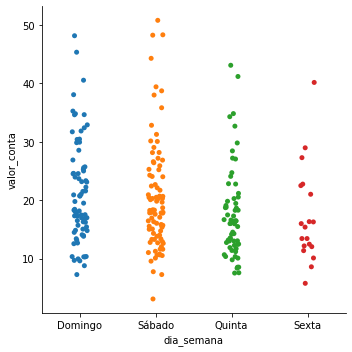

In [ ]:
sns.catplot(x='dia_semana', y = 'valor_conta', data = gorgetas)

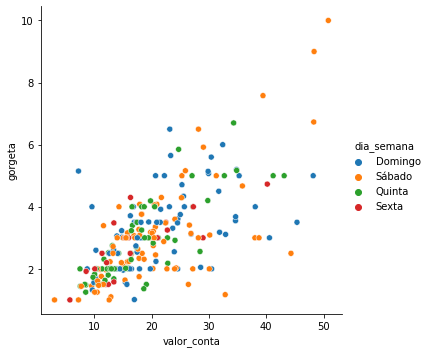

In [ ]:
sns.relplot(x='valor_conta', y = 'gorgeta', hue ='dia_semana', data = gorgetas)

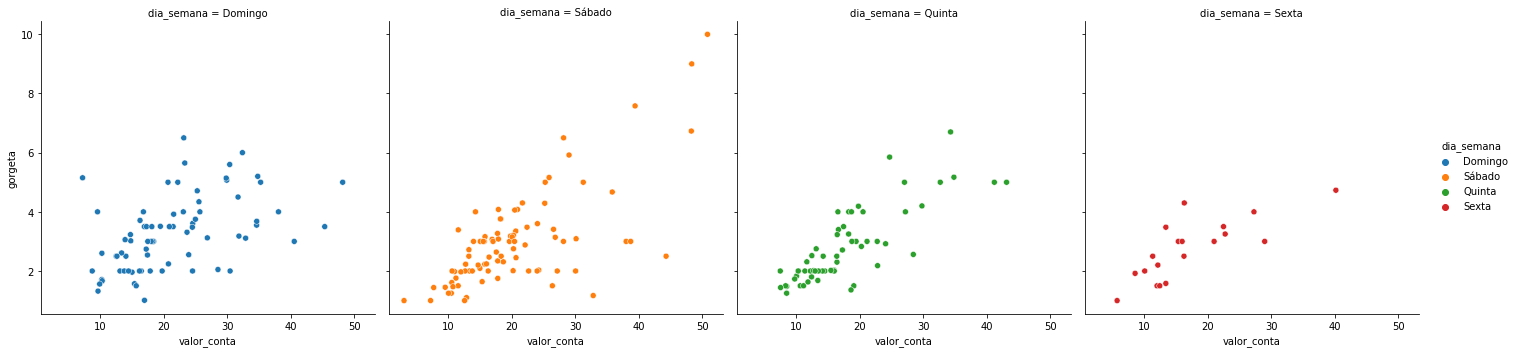

In [ ]:
sns.relplot(x='valor_conta', y = 'gorgeta', hue= 'dia_semana', col ='dia_semana', data = gorgetas)

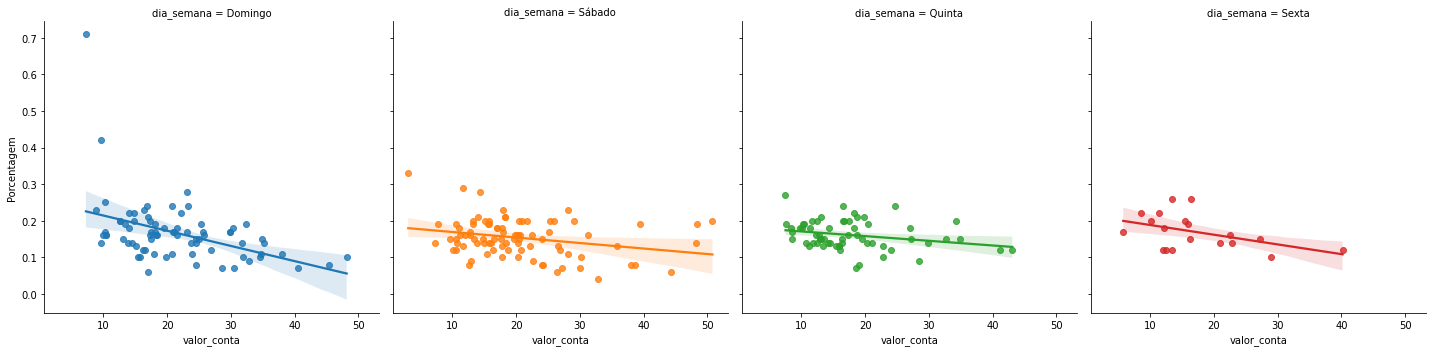

In [ ]:
  sns.lmplot(x='valor_conta', y = 'Porcentagem', hue = 'dia_semana', col ='dia_semana',data = gorgetas)

In [ ]:
media_geral_gorgetas= gorgetas.gorgeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorgetas))

A média geral das gorjetas é de 2.9982786885245902


In [ ]:
gorgetas.groupby('dia_semana').mean().round(2)[['valor_conta','gorgeta', 'Porcentagem']]

,valor_conta,gorgeta,Porcentagem
dia_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


In [ ]:
print('Frequência dos dias')
gorgetas.dia_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

>** A distribuição do valor da conta é a mesma no sábado e no domingo**

**H<sup>alt</sup>**

>** A distribuição do valor da conta não é a mesma no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorgetas.query("dia_semana =='Domingo'").valor_conta

In [ ]:
valor_conta_sabado = gorgetas.query("dia_semana =='Sábado'").valor_conta

In [ ]:
r2 =ranksums(valor_conta_domingo,valor_conta_sabado)
print( 'O valor do p-value é {}'.format(r2.pvalue.round(2)))

O valor do p-value é 0.36


**A diferença é insignificante - ou seja a distribuição é a mesma**

# Análise IV - Hora do dia

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorgetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

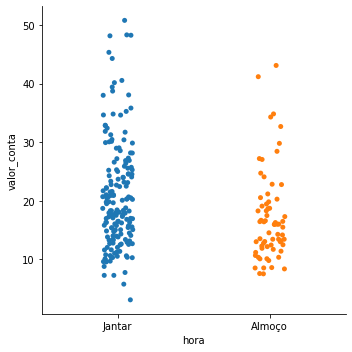

In [ ]:
sns.catplot(x='hora', y = 'valor_conta', data= gorgetas)

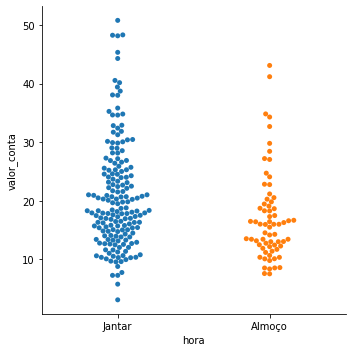

In [ ]:
sns.catplot(x='hora', y='valor_conta',kind='swarm', data= gorgetas)

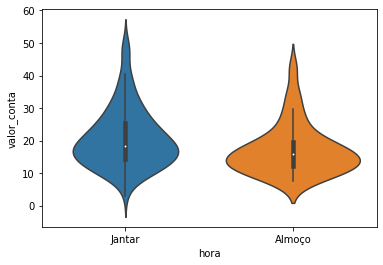

In [ ]:
sns.violinplot(x='hora', y ='valor_conta', data = gorgetas)

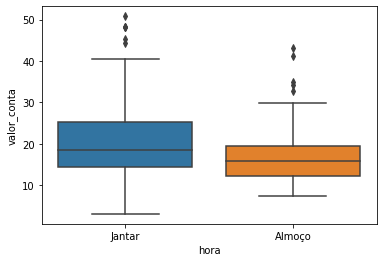

In [ ]:
sns.boxplot(x= 'hora', y= 'valor_conta', data = gorgetas)

In [ ]:
almoco = gorgetas.query("hora == 'Almoço'").valor_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


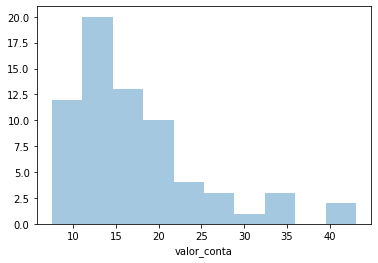

In [ ]:
sns.distplot(almoco, kde = False)

In [ ]:
janta = gorgetas.query("hora == 'Jantar'").valor_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


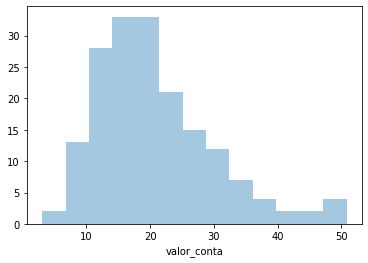

In [ ]:
sns.distplot(janta, kde = False)

## Teste hipótese

**H<sup>null</sup>**

>** A distribuição do valor da conta é a mesma no almoço e no jantar**

**H<sup>alt</sup>**

>** A distribuição do valor da conta não é a mesma no almoço e no jantar**

In [ ]:
gorgetas.groupby(['hora']).mean()[['valor_conta','gorgeta', 'Porcentagem']]

,valor_conta,gorgeta,Porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [ ]:
r3 = ranksums(janta, almoco)
r3

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [ ]:

print( 'O valor do p-value é {}'.format(r3.pvalue.round(5)))

O valor do p-value é 0.00118


**A distribuição não é igual, houve diferença significativa nos valores**

Hnull

** A distribuição da taxa gorjeta é a mesma no almoço e no jantar**

Halt

** A distribuição da taxa gorjeta não é a mesma no almoço e no jantar**

In [ ]:
porcentagem_alomoco = gorgetas.query("hora =='Almoço'").Porcentagem

In [ ]:
porcentagem_jantar = gorgetas.query("hora =='Jantar'").Porcentagem

In [ ]:
r4 = ranksums(porcentagem_alomoco, porcentagem_jantar)

In [ ]:
print( 'O valor do p-value é {}'.format(r4.pvalue.round(5)))

O valor do p-value é 0.26025


**A distribuição é igual, não houve diferença significativa nos valores**

# Dados atualizados

In [ ]:
dados = pd.read_csv ('tips_atualizado.csv')

In [ ]:
gorgetas = dados.rename(columns = renomear)

In [ ]:
gorgetas.sobremesa =gorgetas.sobremesa.map(sim_nao)

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,No,Domingo,Jantar,2,0.06
1,10.34,1.66,No,Domingo,Jantar,3,0.16
2,21.01,3.50,No,Domingo,Jantar,3,0.17
3,23.68,3.31,No,Domingo,Jantar,2,0.14
4,24.59,3.61,No,Domingo,Jantar,4,0.15


In [ ]:
gorgetas.dia_semana = gorgetas.dia_semana.map(semana)

In [ ]:
gorgetas.hora = gorgetas.hora.map(hora)

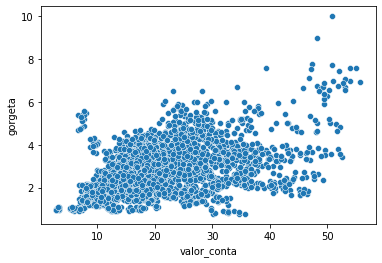

In [ ]:
valor_gorgeta = sns.scatterplot(x = 'valor_conta', y = 'gorgeta', data = gorgetas)

In [ ]:
print ('A base de dados contém: {} registros \n'.format(gorgetas.shape[0]))

A base de dados contém: 3416 registros 



In [ ]:
print ('Registros não nulos')
gorgetas.count()

Registros não nulos


valor_conta      3416
gorgeta          3416
sobremesa        3416
dia_semana       3416
hora             3416
total_pessoas    3416
dtype: int64

In [ ]:
gorgetas['Porcentagem']= gorgetas['gorgeta']/ gorgetas['valor_conta']

In [ ]:
gorgetas.Porcentagem = gorgetas.Porcentagem.round(2)

## Sobremesa

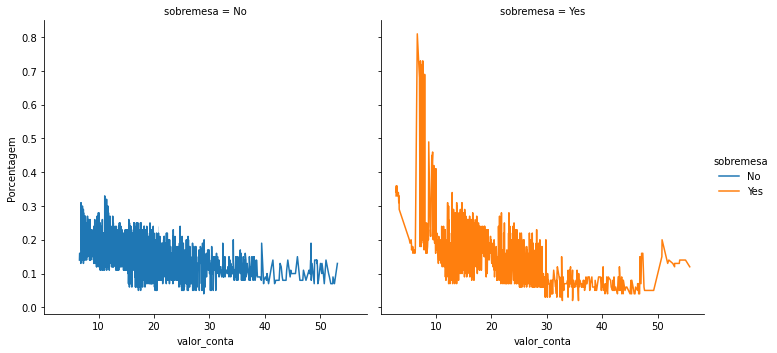

In [ ]:
sns.relplot(x='valor_conta', y='Porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorgetas)

In [ ]:
sobremesa =gorgetas.query("sobremesa =='Sim'").Porcentagem

In [ ]:
sem_sobremesa =gorgetas.query("sobremesa =='Não'").Porcentagem

In [ ]:
gorgetas.head()

,valor_conta,gorgeta,sobremesa,dia_semana,hora,total_pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
sobremesa.mean()

0.15342549923195067

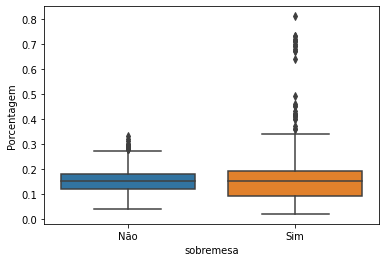

In [ ]:
sns.boxplot(x = 'sobremesa', y = 'Porcentagem', data = gorgetas)

In [ ]:
sem_sobremesa.mean()

0.1500331125827812

In [ ]:
ranksums(sem_sobremesa,sobremesa)

RanksumsResult(statistic=2.130334422180308, pvalue=0.033144013617673405)

**A diferença entre quem pede ou não sobremesa é significativa, ou seja quem pede sobremesa tende a pagar mais gorgeta**

##Dia da semana

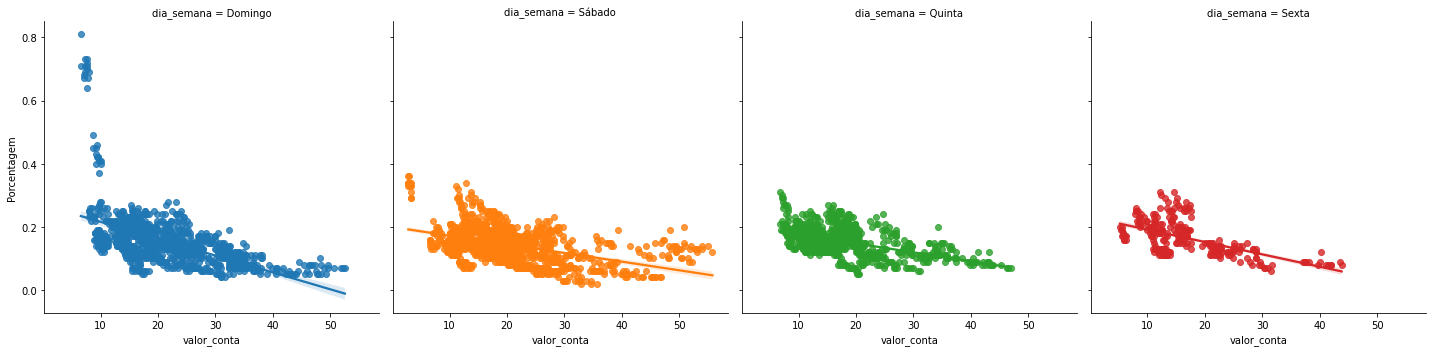

In [ ]:
  sns.lmplot(x='valor_conta', y = 'Porcentagem', hue = 'dia_semana', col ='dia_semana',data = gorgetas)\

In [ ]:
gorgetas.groupby('dia_semana').mean().round(2)[['valor_conta','gorgeta', 'Porcentagem']]

,valor_conta,gorgeta,Porcentagem
dia_semana,,,
Domingo,21.44,2.90,0.15
Quinta,17.72,2.56,0.15
Sexta,17.22,2.55,0.16
Sábado,20.48,2.69,0.14


In [ ]:
valor_conta_domingo = gorgetas.query("dia_semana =='Domingo'").valor_conta

In [ ]:
valor_conta_sabado = gorgetas.query("dia_semana =='Sábado'").valor_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

**A diferença entre quem vai de sabado ou domingo é significativa, ou seja quem vai de domingo tende a pagar mais gorgeta**

## Hora dia

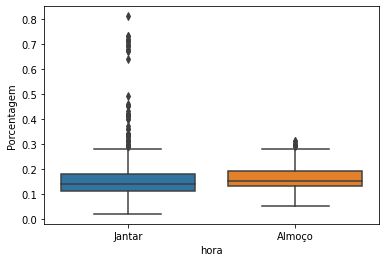

In [ ]:
sns.boxplot(x= 'hora', y= 'Porcentagem', data = gorgetas)

In [ ]:
porcentagem_almoco = gorgetas.query("hora =='Almoço'").Porcentagem

In [ ]:
porcentagem_jantar = gorgetas.query("hora =='Jantar'").Porcentagem

In [ ]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

**A diferença entre quem vai no almoço ou jantar não é significativa, ou seja nã tem diferença na porcentagem de gorgeta**